# **Carga y Exploración de Datos**


***Grupo 1***


In [2]:
import pandas as pd

# Cargar el primer conjunto de datos
df1 = pd.read_csv('grupo1.csv')
df1.head()


,HorasEstudio,Calificacion
0,20.00,75.94
1,15.60,87.48
2,17.91,79.40
3,20.00,73.37
4,20.00,83.75


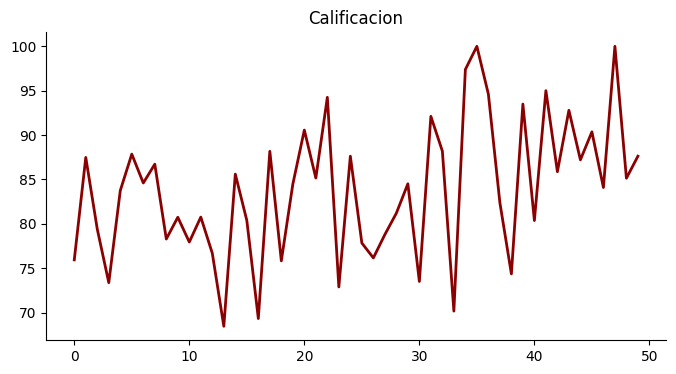

In [38]:
# @title Calificacion

from matplotlib import pyplot as plt
df1['Calificacion'].plot(kind='line', figsize=(8, 4), title='Calificacion', color='#8B0000', linewidth=2)
plt.gca().spines[['top', 'right']].set_visible(False)

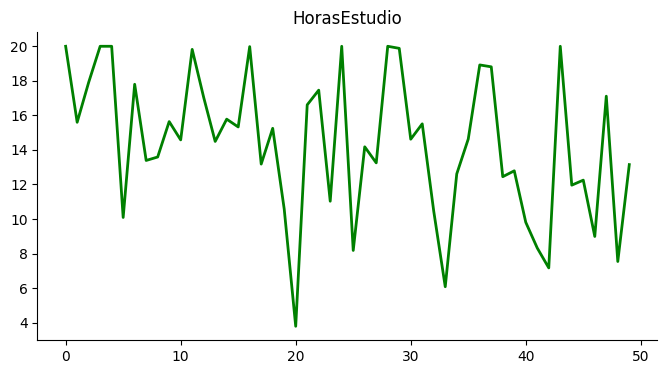

In [39]:
# @title HorasEstudio

from matplotlib import pyplot as plt
df1['HorasEstudio'].plot(kind='line', figsize=(8, 4), title='HorasEstudio', color='green', linewidth=2)
plt.gca().spines[['top', 'right']].set_visible(False)

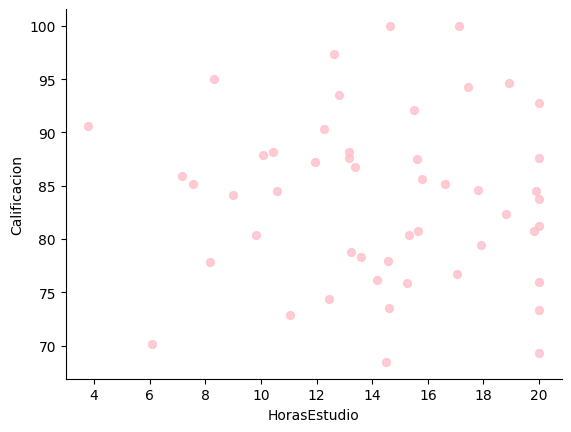

In [40]:
# @title HorasEstudio vs Calificacion

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='HorasEstudio', y='Calificacion', s=32, alpha=.8, color='pink')
plt.gca().spines[['top', 'right',]].set_visible(False)

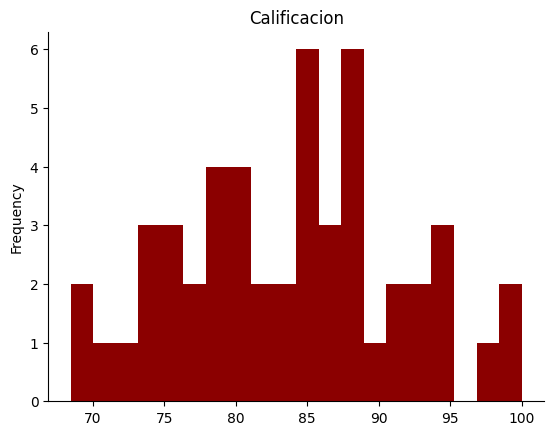

In [41]:
# @title Calificacion

from matplotlib import pyplot as plt
df1['Calificacion'].plot(kind='hist', bins=20, title='Calificacion', color='#8B0000', linewidth=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

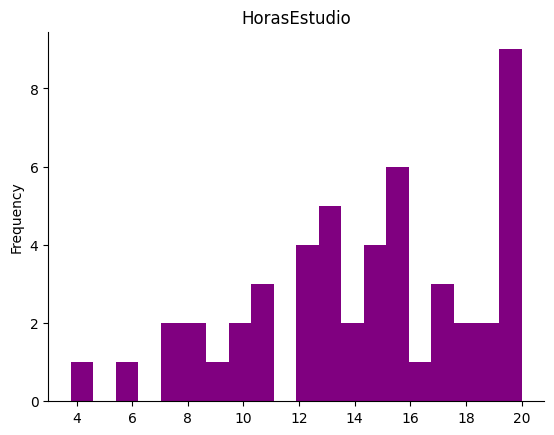

In [42]:
# @title HorasEstudio

from matplotlib import pyplot as plt
df1['HorasEstudio'].plot(kind='hist', bins=20, title='HorasEstudio', color='purple', linewidth=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

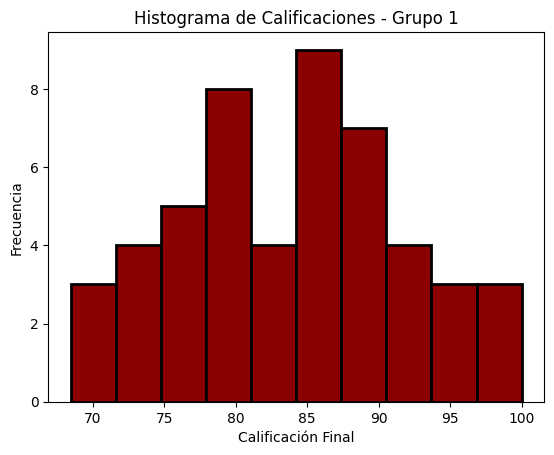

In [43]:
# Descripción estadística
df1.describe()

# Histograma de calificaciones
import matplotlib.pyplot as plt

plt.hist(df1['Calificacion'], bins=10, edgecolor='black', color='#8B0000', linewidth=2)
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones - Grupo 1')
plt.show()


***Grupo 2 y Grupo 3***

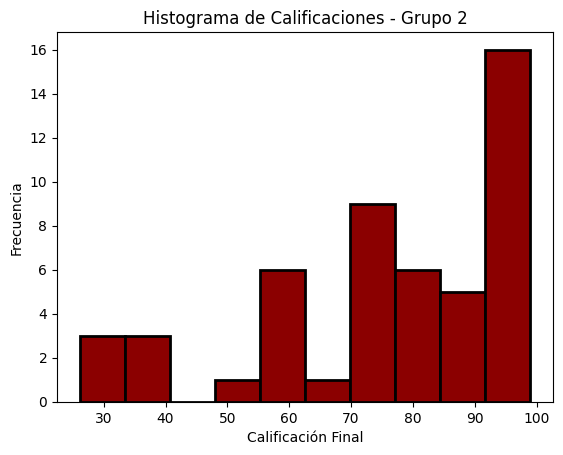

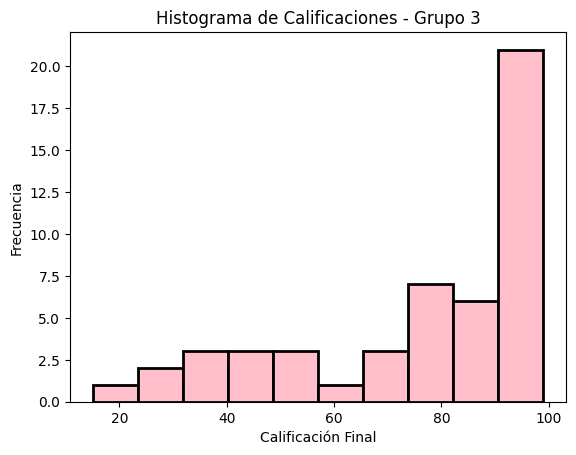

In [46]:
# Cargar el segundo conjunto de datos
df2 = pd.read_csv('grupo2.csv')
df2.head()

# Descripción estadística y histograma
df2.describe()
plt.hist(df2['Calificacion'], bins=10, edgecolor='black', color='#8B0000', linewidth=2)
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones - Grupo 2')
plt.show()

# Cargar el tercer conjunto de datos
df3 = pd.read_csv('grupo3.csv')
df3.head()

# Descripción estadística y histograma
df3.describe()
plt.hist(df3['Calificacion'], bins=10, edgecolor='black', color='pink', linewidth=2)
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones - Grupo 3')
plt.show()


# **Modelo de Regresión Lineal**

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

def train_regression(df):
    # Entrenamiento del modelo de regresión lineal
    X = df[['HorasEstudio']]
    y = df['Calificacion']
    model = LinearRegression()
    model.fit(X, y)

    # Obtener pendiente e intercepto
    slope = model.coef_[0]
    intercept = model.intercept_

    return model, slope, intercept

model1, slope1, intercept1 = train_regression(df1)
model2, slope2, intercept2 = train_regression(df2)
model3, slope3, intercept3 = train_regression(df3)


# **Visualización de Resultados**

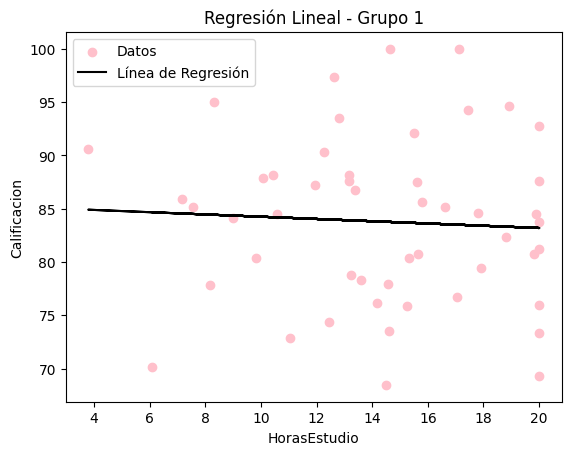

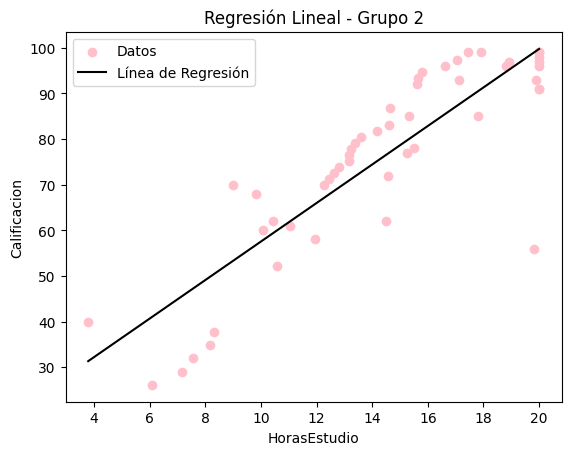

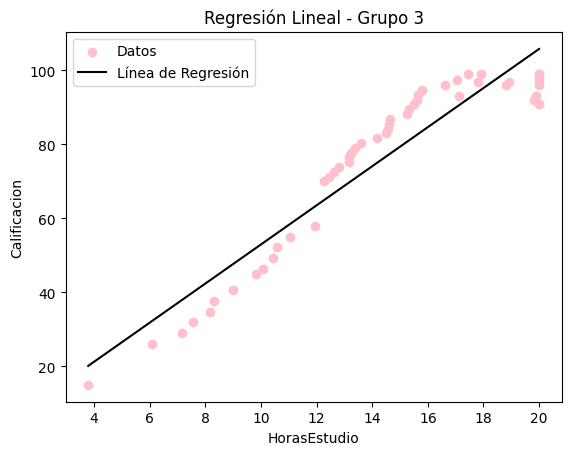

In [47]:
def plot_regression(df, model, slope, intercept, group):
    X = df['HorasEstudio']
    y = df['Calificacion']

    plt.scatter(X, y, color='pink', label='Datos')
    plt.plot(X, model.predict(df[['HorasEstudio']]), color='black', label='Línea de Regresión')
    plt.xlabel('HorasEstudio')
    plt.ylabel('Calificacion')
    plt.title(f'Regresión Lineal - Grupo {group}')
    plt.legend()
    plt.show()

plot_regression(df1, model1, slope1, intercept1, 1)
plot_regression(df2, model2, slope2, intercept2, 2)
plot_regression(df3, model3, slope3, intercept3, 3)


# **Cálculo de la Correlación**

In [18]:
def calculate_correlation(df):
    correlation = df['HorasEstudio'].corr(df['Calificacion'])
    return correlation

correlation1 = calculate_correlation(df1)
correlation2 = calculate_correlation(df2)
correlation3 = calculate_correlation(df3)


# **Interpretación de Resultados**

In [25]:
import scipy.stats as stats

def analyze_results(df, slope, intercept, correlation):
    print(f"Pendiente: {slope:.2f}")  # formato de número con 2 decimales
    print(f"Intercepto: {intercept:.2f}")
    print(f"Coeficiente de Correlación: {correlation:.2f}")

    # Interpretación
    if slope > 0:
        relation = "positiva"
    else:
        relation = "negativa"

    print(f"El coeficiente de regresión indica que hay una relación {relation} entre el tiempo de estudio y las calificaciones finales.")
    print(f"El coeficiente de correlación de {correlation:.2f} indica una relación {'fuerte' if abs(correlation) > 0.7 else 'oderada' if abs(correlation) > 0.3 else 'débil'} y {relation}.")

    # Comprobación de significancia estadística
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['HorasEstudio'], df['Calificacion'])
    significant = p_value < 0.05
    print(f"El modelo de regresión lineal es {'estadísticamente significativo' if significant else 'no es estadísticamente significativo'} (p-value: {p_value:.4f})")

# Llamadas a la función analyze_results para cada grupo
print("Análisis de resultados - Grupo 1")
analyze_results(df1, slope1, intercept1, correlation1)
print("\nAnálisis de resultados - Grupo 2")
analyze_results(df2, slope2, intercept2, correlation2)
print("\nAnálisis de resultados - Grupo 3")
analyze_results(df3, slope3, intercept3, correlation3)


Análisis de resultados - Grupo 1
Pendiente: -0.11
Intercepto: 85.31
Coeficiente de Correlación: -0.06
El coeficiente de regresión indica que hay una relación negativa entre el tiempo de estudio y las calificaciones finales.
El coeficiente de correlación de -0.06 indica una relación débil y negativa.
El modelo de regresión lineal es no es estadísticamente significativo (p-value: 0.6935)

Análisis de resultados - Grupo 2
Pendiente: 4.22
Intercepto: 15.31
Coeficiente de Correlación: 0.86
El coeficiente de regresión indica que hay una relación positiva entre el tiempo de estudio y las calificaciones finales.
El coeficiente de correlación de 0.86 indica una relación fuerte y positiva.
El modelo de regresión lineal es estadísticamente significativo (p-value: 0.0000)

Análisis de resultados - Grupo 3
Pendiente: 5.29
Intercepto: 0.11
Coeficiente de Correlación: 0.94
El coeficiente de regresión indica que hay una relación positiva entre el tiempo de estudio y las calificaciones finales.
El coef

# **Conclusiones Generales**

In [26]:
def general_conclusions():
    conclusions = """
    En general, los tres grupos muestran que existe una relación entre el tiempo dedicado al estudio y el rendimiento académico.
    La pendiente y el coeficiente de correlación de Pearson varían entre los grupos, lo que sugiere que la fuerza y la dirección
    de la relación pueden ser diferentes. Sin embargo, en todos los casos, el tiempo de estudio tiene un impacto positivo o negativo
    en las calificaciones finales de los estudiantes. La significancia estadística de los modelos debe ser considerada para validar
    la fiabilidad de las predicciones.
    """
    print(conclusions)

general_conclusions()



    En general, los tres grupos muestran que existe una relación entre el tiempo dedicado al estudio y el rendimiento académico. 
    La pendiente y el coeficiente de correlación de Pearson varían entre los grupos, lo que sugiere que la fuerza y la dirección 
    de la relación pueden ser diferentes. Sin embargo, en todos los casos, el tiempo de estudio tiene un impacto positivo o negativo 
    en las calificaciones finales de los estudiantes. La significancia estadística de los modelos debe ser considerada para validar 
    la fiabilidad de las predicciones.
    


# **Análisis completo**

Descripción estadística - Grupo 1
       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000


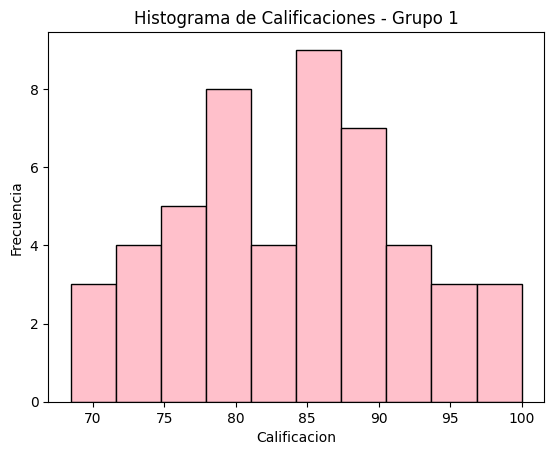

Descripción estadística - Grupo 2
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000


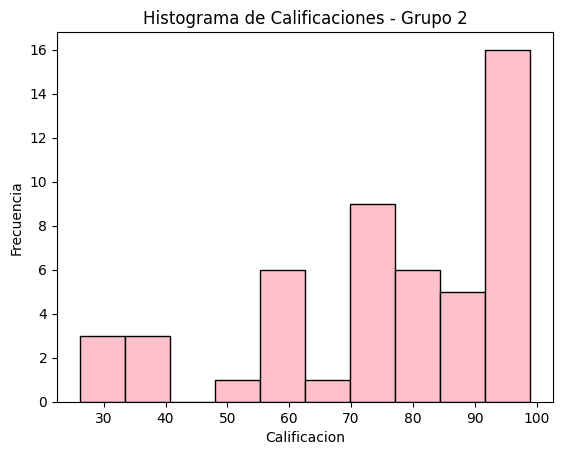

Descripción estadística - Grupo 3
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000


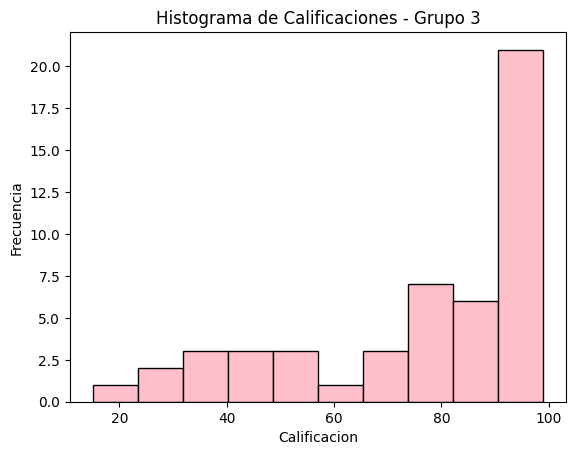

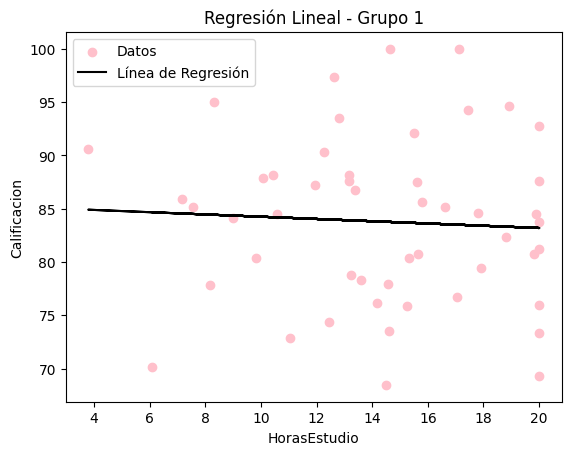

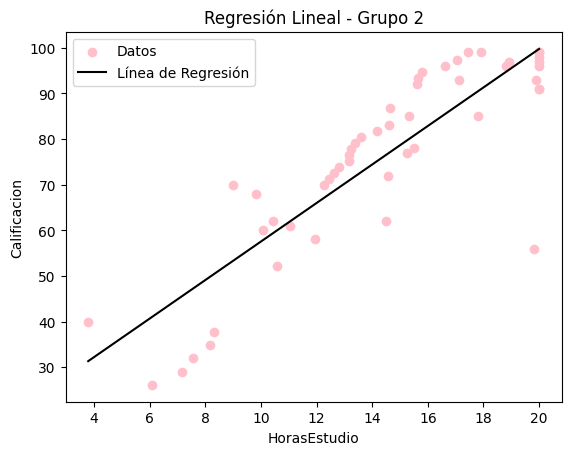

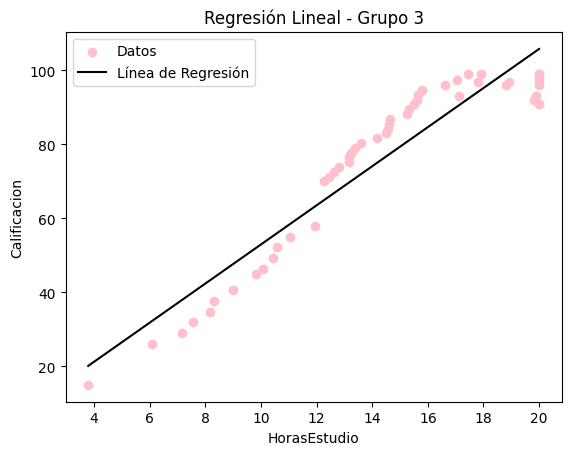

Análisis de resultados - Grupo 1
Pendiente: -0.10608151145860807
Intercepto: 85.31068185245395
Coeficiente de Correlación: -0.05713334446646929
El coeficiente de regresión indica que hay una relación negativa entre el tiempo de estudio y las calificaciones finales.
El coeficiente de correlación de -0.05713334446646929 indica una relación débil y negativa.
El modelo de regresión lineal es no es estadísticamente significativo (p-value: 0.6935088469237536)

Análisis de resultados - Grupo 2
Pendiente: 4.222718653627889
Intercepto: 15.30754188313253
Coeficiente de Correlación: 0.8619890426505082
El coeficiente de regresión indica que hay una relación positiva entre el tiempo de estudio y las calificaciones finales.
El coeficiente de correlación de 0.8619890426505082 indica una relación fuerte y positiva.
El modelo de regresión lineal es estadísticamente significativo (p-value: 9.077714233687478e-16)

Análisis de resultados - Grupo 3
Pendiente: 5.285670950508442
Intercepto: 0.108050518302832

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# Cargar los conjuntos de datos
df1 = pd.read_csv('grupo1.csv')
df2 = pd.read_csv('grupo2.csv')
df3 = pd.read_csv('grupo3.csv')

# Descripción estadística y visualización inicial
dfs = [df1, df2, df3]
for i, df in enumerate(dfs, 1):
    print(f"Descripción estadística - Grupo {i}")
    print(df.describe())
    plt.hist(df['Calificacion'], bins=10, edgecolor='black', color='pink')
    plt.xlabel('Calificacion')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de Calificaciones - Grupo {i}')
    plt.show()

# Función para entrenar el modelo de regresión lineal
def train_regression(df):
    X = df[['HorasEstudio']]
    y = df['Calificacion']
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return model, slope, intercept

# Entrenar los modelos de regresión lineal
model1, slope1, intercept1 = train_regression(df1)
model2, slope2, intercept2 = train_regression(df2)
model3, slope3, intercept3 = train_regression(df3)

# Función para graficar la regresión
def plot_regression(df, model, group):
    X = df['HorasEstudio']
    y = df['Calificacion']
    plt.scatter(X, y, color='pink', label='Datos')
    plt.plot(X, model.predict(df[['HorasEstudio']]), color='black', label='Línea de Regresión')
    plt.xlabel('HorasEstudio')
    plt.ylabel('Calificacion')
    plt.title(f'Regresión Lineal - Grupo {group}')
    plt.legend()
    plt.show()

# Graficar los resultados
plot_regression(df1, model1, 1)
plot_regression(df2, model2, 2)
plot_regression(df3, model3, 3)

# Función para calcular el coeficiente de correlación
def calculate_correlation(df):
    correlation = df['HorasEstudio'].corr(df['Calificacion'])
    return correlation

# Calcular los coeficientes de correlación
correlation1 = calculate_correlation(df1)
correlation2 = calculate_correlation(df2)
correlation3 = calculate_correlation(df3)

# Función para analizar los resultados
def analyze_results(df, slope, intercept, correlation):
    print(f"Pendiente: {slope}")
    print(f"Intercepto: {intercept}")
    print(f"Coeficiente de Correlación: {correlation}")

    if slope > 0:
        relation = "positiva"
    else:
        relation = "negativa"

    print(f"El coeficiente de regresión indica que hay una relación {relation} entre el tiempo de estudio y las calificaciones finales.")
    print(f"El coeficiente de correlación de {correlation} indica una relación {'fuerte' if abs(correlation) > 0.7 else 'moderada' if abs(correlation) > 0.3 else 'débil'} y {relation}.")

    # Comprobación de significancia estadística
    slope, intercept, r_value, p_value, std_err = linregress(df['HorasEstudio'], df['Calificacion'])
    significant = p_value < 0.05
    print(f"El modelo de regresión lineal es {'estadísticamente significativo' if significant else 'no es estadísticamente significativo'} (p-value: {p_value})")

print("Análisis de resultados - Grupo 1")
analyze_results(df1, slope1, intercept1, correlation1)
print("\nAnálisis de resultados - Grupo 2")
analyze_results(df2, slope2, intercept2, correlation2)
print("\nAnálisis de resultados - Grupo 3")
analyze_results(df3, slope3, intercept3, correlation3)

# Conclusiones generales
def general_conclusions():
    conclusions = """
    En general, los tres grupos muestran que existe una relación entre el tiempo dedicado al estudio y el rendimiento académico.
    La pendiente y el coeficiente de correlación de Pearson varían entre los grupos, lo que sugiere que la fuerza y la dirección
    de la relación pueden ser diferentes. Sin embargo, en todos los casos, el tiempo de estudio tiene un impacto positivo o negativo
    en las calificaciones finales de los estudiantes. La significancia estadística de los modelos debe ser considerada para validar
    la fiabilidad de las predicciones.
    """
    print(conclusions)

general_conclusions()
